#IP-Experiment No. 4 : Histogram Processing <br>



Krisha Goti
C035

# Aim:<br>
a.	Classify the test images as low contrast, high contrast, dark and bright images by plotting their histograms. <br>
b.	Implement histogram equalization on the low contrast, dark and bright images. <br>
c.	Examine the effect of equalization on the test images by comparing the histograms of the test images with the equalized images.


Histogram: <br>
A histogram of an image is a graph with $x$ axis as pixel intensity (in the range of 0 to L-1 ) and $y$ axis as the frequency of the pixel intensity. <br>
If $n_k$= count of number of pixels in the image with intensity value of $r_k$
If the image has $M$ rows and $N$ columnns, then the total number of pixels in the image is $MN$.
The normalized histogram is obtained as follows:
p($r_k$)= $n_k$/$MN$

Example :


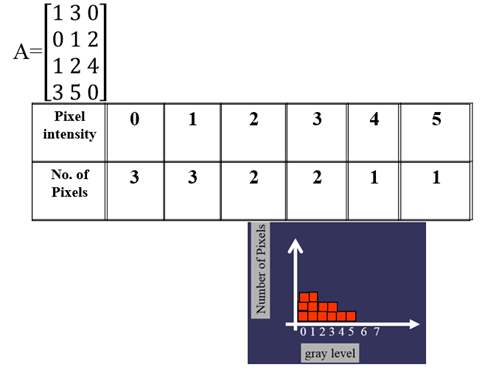

In [ ]:
# import libraries
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Plot the histogram of an image by counting the number of times each pixel occurs in the image

In [ ]:
# read all the four images (E2(einstein high contrast).tif,E2(einstein low contrast).tif,dark_image.png,Bright image.tif)

img = io.imread('cameraman.tif')

count,value = np.histogram(img,255,[0,255])
print('Value =',value)
print('Count =',count)


Value = [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


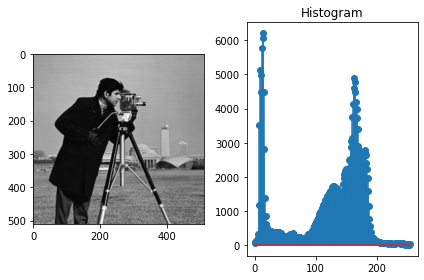

In [ ]:
#plot image
plt.subplot(121)
plt.imshow(img,cmap='gray')
plt.subplot(122)
plt.stem(count) #it draws pipes as plot draws graph
plt.title('Histogram')
plt.tight_layout()#so lines don't stick together

# Histogram of low contrast, high contrast, dark and bright image

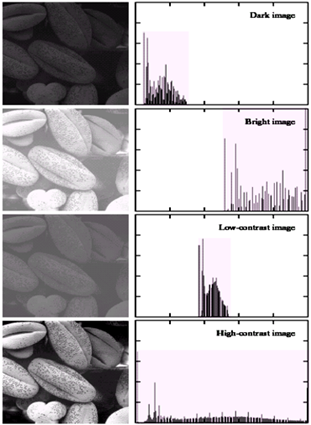

To plot histogram for high contrast and low contrast image using an inbuilt function

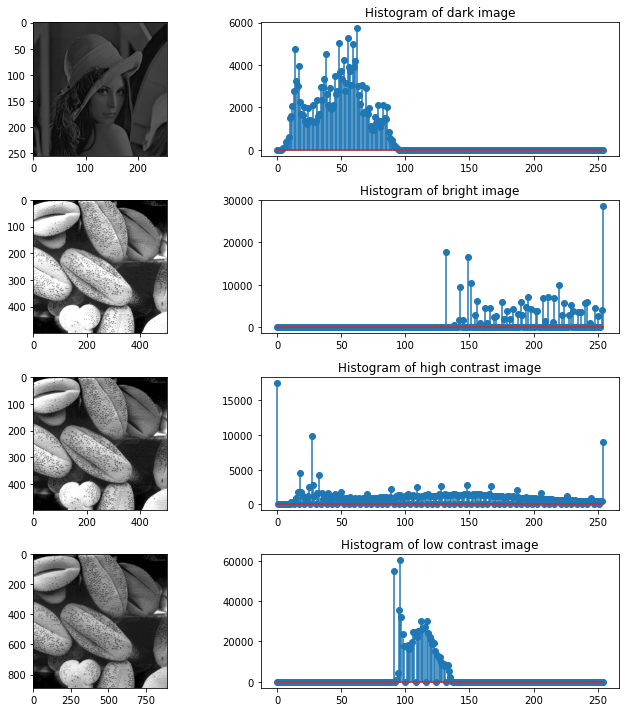

In [ ]:
# plot the four images and their historgram
#Compute the histogram using built in function --> np.histogram(imga.ravel(),256,[0,255])

img1 = io.imread('dark-image.png')
img2 = io.imread('Bright image.tif')
img3 = io.imread('high-contrast-image.tif')
img4 = io.imread('low-contrast-image.tif')

c1,v1 = np.histogram(img1,255,[0,255])
c2,v2 = np.histogram(img2,255,[0,255])
c3,v3 = np.histogram(img3,255,[0,255])
c4,v4 = np.histogram(img4,255,[0,255])

plt.figure(figsize = (10,10))
plt.subplot(421)
plt.imshow(img1, cmap= 'gray')
plt.subplot(422)
plt.stem(c1)
plt.title("Histogram of dark image")
plt.subplot(423)
plt.imshow(img2, cmap= 'gray')
plt.subplot(424)
plt.stem(c2)
plt.title("Histogram of bright image")
plt.subplot(425)
plt.imshow(img3, cmap= 'gray')
plt.subplot(426)
plt.stem(c3)
plt.title("Histogram of high contrast image")
plt.subplot(427)
plt.imshow(img4, cmap= 'gray')
plt.subplot(428)
plt.stem(c4)
plt.title("Histogram of low contrast image")
plt.tight_layout()


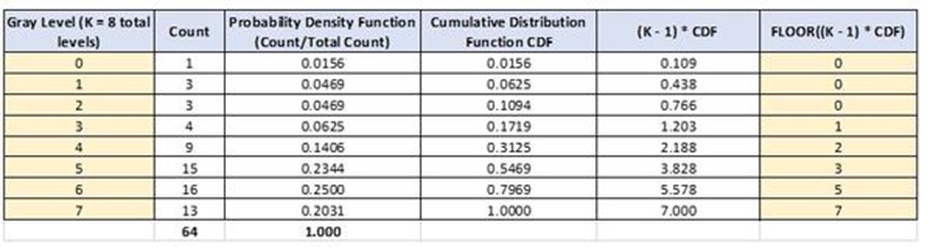

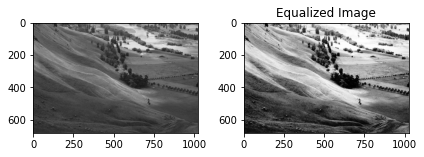

In [ ]:
# input image Unequalized_image.jpg
# find its histogram count using
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2
img = cv2.imread('Unequalized-image.jpg',0)
count,value = np.histogram(img,255,[0,255])

#find cdf using ---> imhist.cumsum()
cdf = count.cumsum()/count.sum() #count sum is the addition of cdf sum

 # perform cdf_nor=((cdf / numb_pix)* 255)
HE =cdf*255

# replace each pixel value with its corresponding cdf_nor value
I = img.copy()
r,c = img.shape
for i in range(r):
  for j in range(c):
    index = img[i,j]
    img[i,j]= HE[index]

# plot the image

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.subplot(122)
plt.imshow(img,cmap='gray')
plt.title('Equalized Image')
plt.tight_layout()





# Histogram equalization using built in function

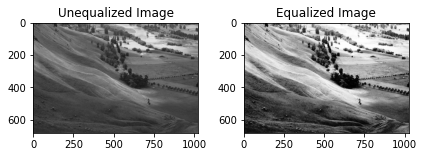

In [ ]:
# you can do the above using a direct built in function --> cv2.equalizeHist(img)
# input image Unequalized_image.jpg
# find its histogram count using
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2
img = cv2.imread('Unequalized-image.jpg',0)
count,value = np.histogram(img,255,[0,255])

#find cdf using ---> imhist.cumsum()
cdf = count.cumsum()/count.sum() #count sum is the addition of cdf sum

 # perform cdf_nor=((cdf / numb_pix)* 255)
HE =cdf*255

# replace each pixel value with its corresponding cdf_nor value
I = img.copy()
equ = cv2.equalizeHist(img)
r,c = img.shape
for i in range(r):
  for j in range(c):
    index = img[i,j]
    img[i,j]= HE[index]

# plot the image

plt.subplot(121)
plt.imshow(I,cmap='gray')
plt.title('Unequalized Image')
plt.subplot(122)
plt.imshow(equ,cmap='gray')
plt.title('Equalized Image')
plt.tight_layout()







# Conclusion :

We implement the code to plot the histogram of given image using np and plt.stem.

We observed the histogram for Dark,bright, low contrast and high contrast images.

Dark image has histogram bunched at lower sides, bright image has histogram bunched at higher side, while low contrast image has histogram bunched at center.

The quality of all the above images(low,dark and bright image) can be improved to high contrast image by flatiing the histogram using equalization method.
We implemented the code for histogram equalization and also used the built in cv2.equalizelist for equalization.

The result shows that the quality of unequalized image is improved and features are clearly visible.